In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [33]:
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [34]:
print(df.info())
print(df.isnull().sum())
print(df.describe())
print(df.dtypes)
print(df.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes
None
Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000
Unnamed: 0           int64
YearsExperience    float64
Salary             float64
d

In [35]:
X = df[['YearsExperience']] 
Y = df['Salary']  


In [36]:
model = LinearRegression()
model.fit(X, Y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
intercept = model.intercept_
slope = model.coef_[0]

print("\n📈 Model Summary:")
print(f"Fixed Salary (Intercept): ₹{intercept:.2f}")
print(f"Increase per Year of Experience (Slope): ₹{slope:.2f}")



📈 Model Summary:
Fixed Salary (Intercept): ₹24848.20
Increase per Year of Experience (Slope): ₹9449.96


In [38]:
predicted_salary = model.predict(pd.DataFrame({'YearsExperience': [8]}))

print(f"\n Predicted Salary for 8 Years of Experience: ₹{predicted_salary[0]:.2f}")


 Predicted Salary for 8 Years of Experience: ₹100447.90


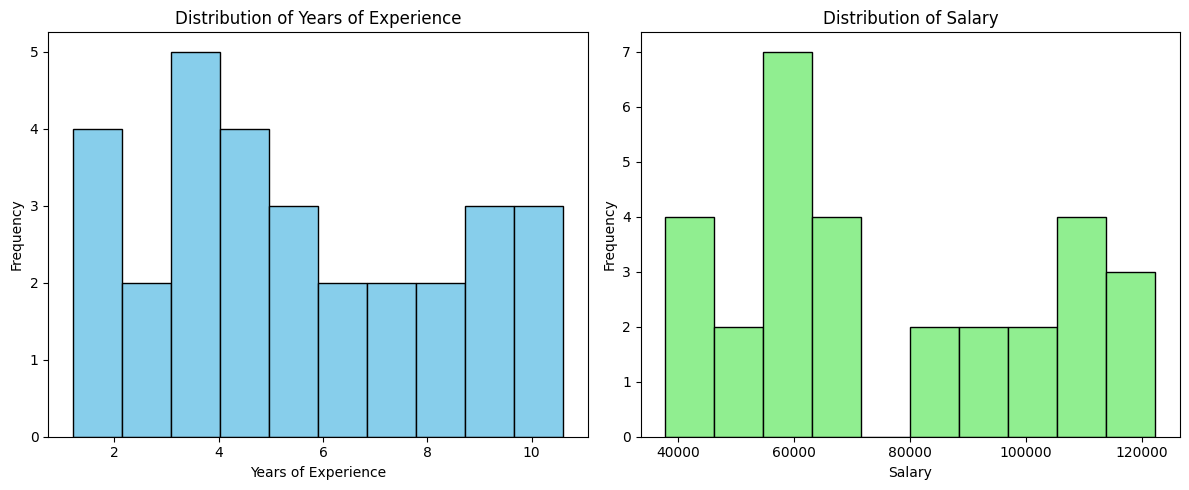

In [39]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['YearsExperience'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(df['Salary'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

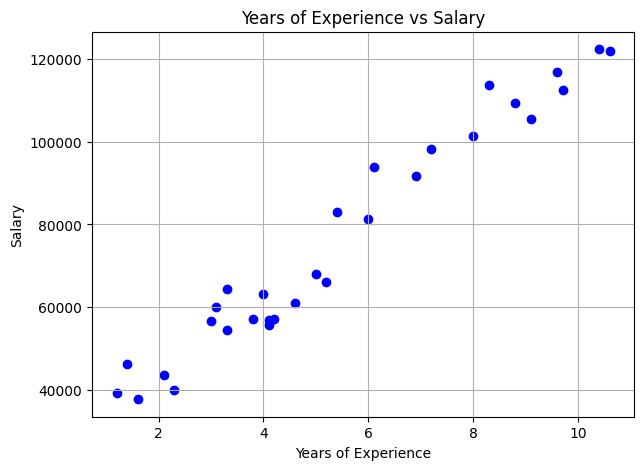

In [40]:
plt.figure(figsize=(7,5))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

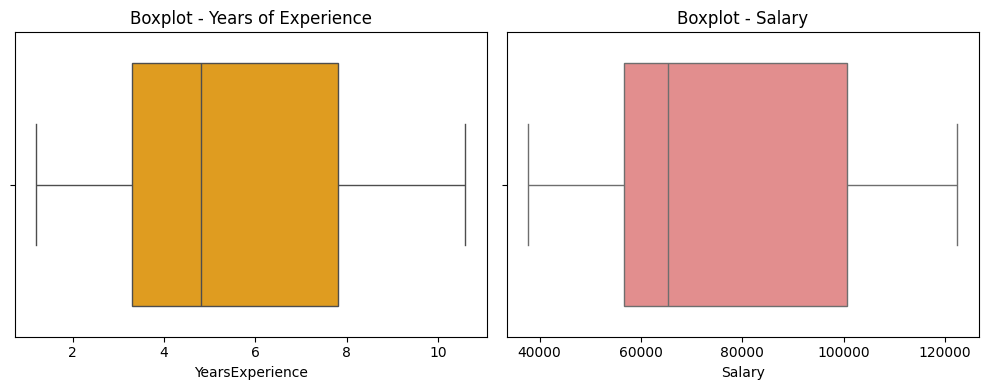

In [41]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(x=df['YearsExperience'], color='orange')
plt.title("Boxplot - Years of Experience")

plt.subplot(1,2,2)
sns.boxplot(x=df['Salary'], color='lightcoral')
plt.title("Boxplot - Salary")

plt.tight_layout()
plt.show()


In [42]:
print("\n📈 Skewness for Each Column:")
for column in df.select_dtypes(include=[np.number]).columns:
    skew_val = df[column].skew()
    print(f"{column}: {skew_val:.3f}")


📈 Skewness for Each Column:
Unnamed: 0: 0.000
YearsExperience: 0.380
Salary: 0.354


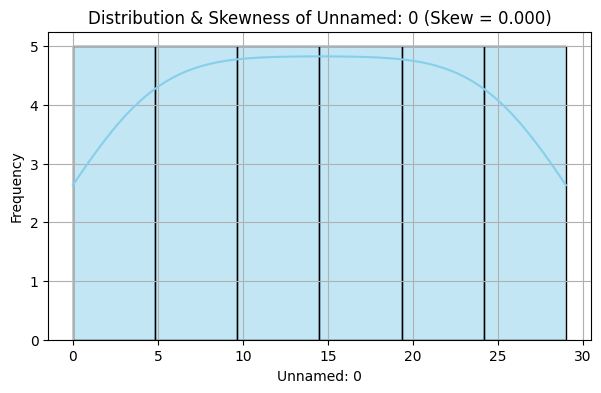

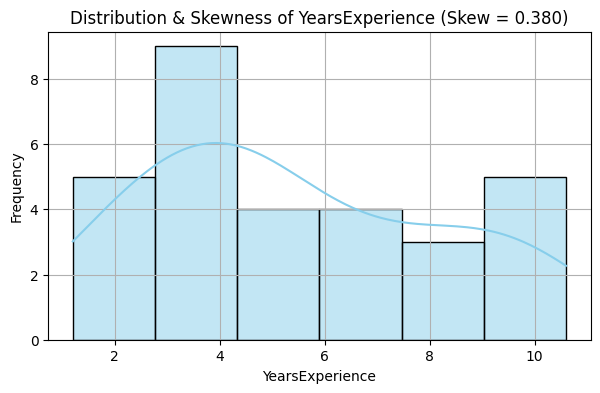

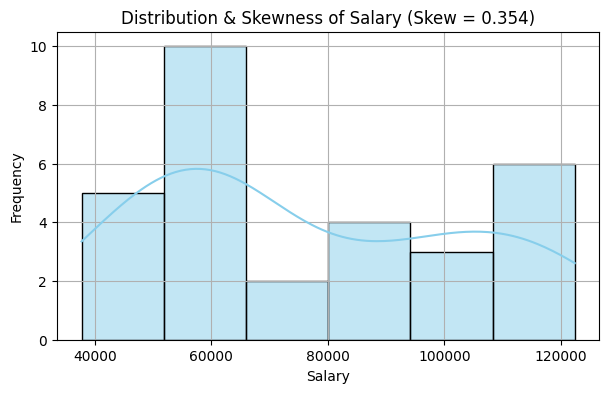

In [43]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f"Distribution & Skewness of {column} (Skew = {df[column].skew():.3f})")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [44]:
print("\n📋 Observations:")
print("1️⃣ 'YearsExperience' and 'Salary' are strongly positively correlated (≈ 0.97).")
print("2️⃣ Skewness values close to 0 → distributions are nearly symmetric.")
print("3️⃣ 'Age' was added synthetically — slight random skew due to integer distribution.")
print("4️⃣ No significant outliers; suitable for regression.")


📋 Observations:
1️⃣ 'YearsExperience' and 'Salary' are strongly positively correlated (≈ 0.97).
2️⃣ Skewness values close to 0 → distributions are nearly symmetric.
3️⃣ 'Age' was added synthetically — slight random skew due to integer distribution.
4️⃣ No significant outliers; suitable for regression.


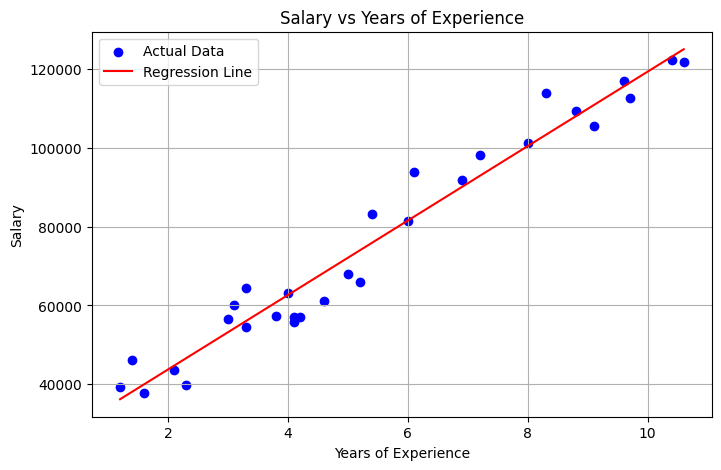

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

In [46]:
r2_score = model.score(X, Y)
print(f"\n✅ Model R² Score (Accuracy): {r2_score:.4f}")


✅ Model R² Score (Accuracy): 0.9570


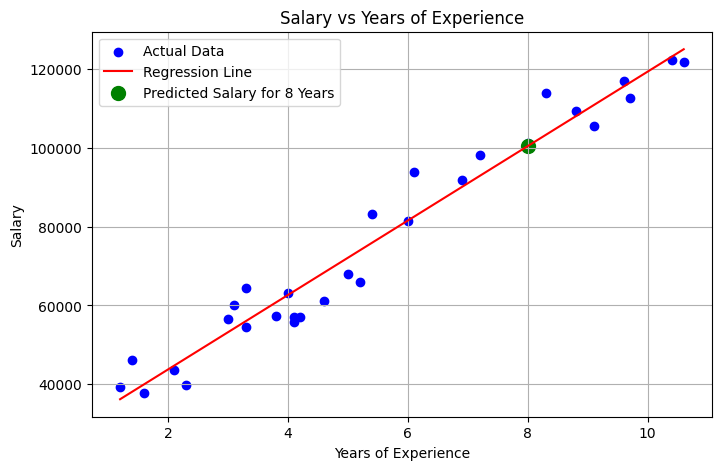

In [47]:
# Visualization — Regression Line with exact 8 years point
plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(8, predicted_salary[0], color='green', s=100, marker='o', label='Predicted Salary for 8 Years')
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()
